In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata

In [2]:
user=pd.read_csv('takehome_users.csv',encoding='latin-1')
engagement=pd.read_csv('takehome_user_engagement.csv')


In [3]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Values are missing in <b>last_session_creation_time</b> and <b>invited_by_user_id </b> columns.

In [5]:
user["creation_time"]= pd.to_datetime(user["creation_time"]) 

In [6]:

#user["last_session_creation_time"]= pd.to_datetime(user["last_session_creation_time"]) 

In [7]:
user.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [8]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [9]:
engagement.shape

(207917, 3)

In [10]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:

engagement["time_stamp"]= pd.to_datetime(engagement["time_stamp"]) 


In [12]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [13]:
engagement.sort_values(by=['user_id', 'time_stamp'], inplace=True)

In [14]:
visit_counts = engagement.groupby(by=['user_id']).count()[['visited']]

In [15]:
user_id = user[['object_id']].copy()
user_id.set_index('object_id', inplace=True)

In [16]:
visit_counts = user_id.join(visit_counts, how='left').fillna(0)

In [17]:
visit_counts.head(10)

,visited
object_id,
1,1.0
2,14.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,0.0


In [18]:
visit_counts['adopted'] = np.nan

In [19]:
visit_counts.loc[visit_counts.visited < 3, 'adopted'] = 0

In [20]:
visit_counts.head()

,visited,adopted
object_id,,
1,1.0,0.0
2,14.0,NaN
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0


In [21]:
three_or_more_ids = visit_counts[visit_counts.adopted.isnull()].index.values.tolist()

In [22]:
len(three_or_more_ids)

2248

In [23]:
three_or_more_rows = engagement[engagement.user_id.isin(three_or_more_ids)].copy()


In [24]:
three_or_more_rows

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
...,...,...,...
207905,2014-04-20 14:22:45,11991,1
207906,2014-04-25 14:22:45,11991,1
207907,2014-04-28 14:22:45,11991,1
207908,2014-05-17 14:22:45,11991,1


In [25]:
def get_date_range(series):
    return (max(series) - min(series))

In [26]:
time_span = three_or_more_rows.groupby('user_id')['time_stamp'].apply(get_date_range)

In [27]:
time_span

user_id
2       136 days
10      503 days
20       79 days
33       81 days
42      558 days
          ...   
11975   419 days
11980    75 days
11981    27 days
11988    76 days
11991    40 days
Name: time_stamp, Length: 2248, dtype: timedelta64[ns]

In [28]:
time_span.min()
#3 days is the minimum time span but we need only 7 days and above

Timedelta('3 days 00:00:00')

In [29]:
users_over_7_days = time_span[time_span >= '7 days'].index.tolist()

In [30]:
len(users_over_7_days)

2240

In [31]:
import datetime
three_or_more_rows['time_stamp'] = three_or_more_rows['time_stamp'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day))
three_or_more_rows

,time_stamp,user_id,visited
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1
5,2013-12-31,2,1
...,...,...,...
207905,2014-04-20,11991,1
207906,2014-04-25,11991,1
207907,2014-04-28,11991,1
207908,2014-05-17,11991,1


So we now know all users who have logged into the product on three separate days in at least one seven-day period. They are the users with ids in users_over_seven_days.

In [32]:
visit_counts.loc[visit_counts.index.isin(users_over_7_days), 'adopted'] = 1

In [33]:
visit_counts[visit_counts.adopted.isnull()]

,visited,adopted
object_id,,
3059,3.0,NaN
3222,3.0,NaN
3638,3.0,NaN
4093,3.0,NaN
4396,3.0,NaN
5970,3.0,NaN
6981,3.0,NaN
10277,3.0,NaN


In [34]:
time_span[time_span < '7 days'].index.tolist()

[3059, 3222, 3638, 4093, 4396, 5970, 6981, 10277]

This is the list of 8 people who have less than 7 days of time span. so they are not considerd as adopted.

In [35]:
visit_counts.loc[visit_counts.index.isin(time_span[time_span < '7 days'].index.tolist()), 'adopted'] = 0

In [36]:
visit_counts.adopted.value_counts()

0.0    9760
1.0    2240
Name: adopted, dtype: int64

In [37]:
visit_counts.head()

,visited,adopted
object_id,,
1,1.0,0.0
2,14.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0


In [38]:
visit_counts.shape


(12000, 2)

In [39]:
user.set_index('object_id', inplace=True)
user.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [40]:
user.shape

(12000, 9)

In [41]:
df = user.join(visit_counts)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   float64       
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
 9   visited                     12000 non-null  float64       
 10  adopted                     12000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)


There are some missing values in <b>last_session_creation_time</b> and <b>invited_by_user_id</b> columns. Missing values are replaced by 0.

In [43]:
df.loc[df.last_session_creation_time.isnull(), 'last_session_creation_time'] = 0


In [44]:
df.loc[df.invited_by_user_id.isnull(), 'invited_by_user_id'] = 0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  12000 non-null  float64       
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          12000 non-null  float64       
 9   visited                     12000 non-null  float64       
 10  adopted                     12000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)


In [46]:
df.drop(labels=['name', 'email', 'visited'], axis=1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   last_session_creation_time  12000 non-null  float64       
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          12000 non-null  float64       
 7   adopted                     12000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.1+ MB


In [48]:
df = pd.get_dummies(df, columns=['creation_source'])

In [49]:
first_date = min(df.creation_time)

In [50]:
new_creating_time = df.creation_time - first_date

In [51]:
df.creation_time = new_creating_time.dt.total_seconds()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   creation_time                       12000 non-null  float64
 1   last_session_creation_time          12000 non-null  float64
 2   opted_in_to_mailing_list            12000 non-null  int64  
 3   enabled_for_marketing_drip          12000 non-null  int64  
 4   org_id                              12000 non-null  int64  
 5   invited_by_user_id                  12000 non-null  float64
 6   adopted                             12000 non-null  float64
 7   creation_source_GUEST_INVITE        12000 non-null  uint8  
 8   creation_source_ORG_INVITE          12000 non-null  uint8  
 9   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 10  creation_source_SIGNUP              12000 non-null  uint8  
 11  creation_source_SIGNUP_GOOGLE_AUTH  12000

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df.drop(['adopted'], axis=1)
y = df['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
rf2 = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=20,bootstrap=True)

# Fit it to the data
rf2.fit(X_train, y_train)
yr2_pred = rf2.predict(X_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rf2.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yr2_pred))

Train set Accuracy:  0.9953571428571428
Test set Accuracy:  0.9391666666666667


The model is managed to get 93.91% of test accuracy.

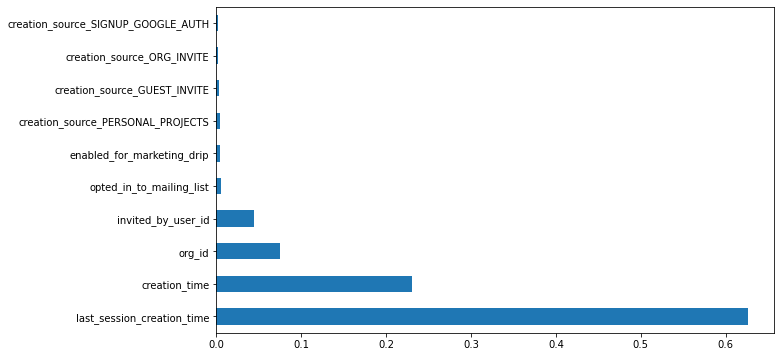

In [54]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The analysis shows that the parameters  <b>last_session_creation_time,creation_time</b>  are the factors to predict the Adoption. But from the analysis it is clear that <b>last_session_creation_time</b> is no where related to adoption and 20% of the data was missing.So  I do not think this is a good factor to predict adopion. 

In [55]:
df.drop(labels=['last_session_creation_time'], axis=1, inplace=True)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df.drop(['adopted'], axis=1)
y = df['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
rf = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=20,bootstrap=True)

# Fit it to the data
rf.fit(X_train, y_train)
yr_pred = rf.predict(X_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rf.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yr_pred))

Train set Accuracy:  0.9698809523809524
Test set Accuracy:  0.7938888888888889


Now the Test accuracy is reduced to 79.38%

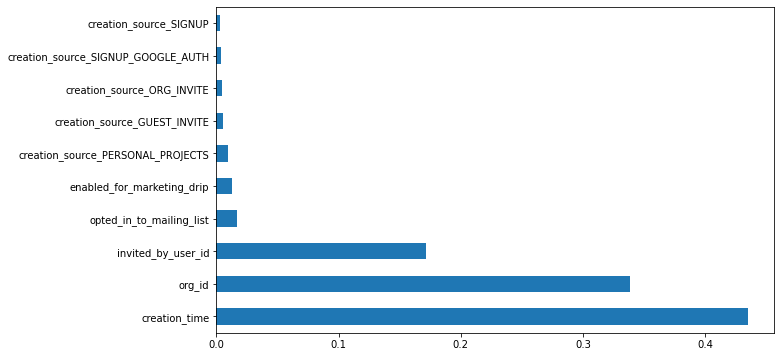

In [58]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()